# 필요한 셀은 추가해서 작성하시면 됩니다.
###### https://github.com/vuski/admdongkor/tree/master/ver20230101/HangJeongDong_ver20230101.geojson 파일 다운로드 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 1. 202302_202302_주민등록인구및세대현황_월간.csv를 가지고 와서 'data'라는 이름의 데이터 프레임으로 작성하고 5개만 확인합니다.

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('202302_202302_주민등록인구및세대현황_월간.csv',encoding='cp949')

In [5]:
data.head()

,행정구역,2023년02월_총인구수,2023년02월_세대수,2023년02월_세대당 인구,2023년02월_남자 인구수,2023년02월_여자 인구수,2023년02월_남여 비율
0,서울특별시 (1100000000),"9,427,583","4,457,982",2.11,"4,567,957","4,859,626",0.94
1,서울특별시 종로구 (1111000000),"141,433","72,773",1.94,"68,399","73,034",0.94
2,서울특별시 종로구 청운효자동(1111051500),"11,605","5,130",2.26,"5,325","6,280",0.85
3,서울특별시 종로구 사직동(1111053000),"9,120","4,593",1.99,"4,060","5,060",0.80
4,서울특별시 종로구 삼청동(1111054000),"2,322","1,143",2.03,"1,104","1,218",0.91


### 2. '행정구역'컬럼을 행정구역명과 행정기관코드로 분리하여 'data' 데이터 프레임에 '행정구역' 컬럼에 행정구역명만 저장하고 5개의 데이터만 확인합니다.

In [8]:
data['행정구역'] = data['행정구역'].str.split('(').str.get(0).str.strip()

In [9]:
data.head()

,행정구역,2023년02월_총인구수,2023년02월_세대수,2023년02월_세대당 인구,2023년02월_남자 인구수,2023년02월_여자 인구수,2023년02월_남여 비율
0,서울특별시,"9,427,583","4,457,982",2.11,"4,567,957","4,859,626",0.94
1,서울특별시 종로구,"141,433","72,773",1.94,"68,399","73,034",0.94
2,서울특별시 종로구 청운효자동,"11,605","5,130",2.26,"5,325","6,280",0.85
3,서울특별시 종로구 사직동,"9,120","4,593",1.99,"4,060","5,060",0.80
4,서울특별시 종로구 삼청동,"2,322","1,143",2.03,"1,104","1,218",0.91


### 3. 'data' 데이터 프레임의 컬럼명을 행정구역, 총인구수, 세대수, 세대당인구, 남자, 여자, 남녀비율 로 변경하고 'data'데이터 프레임의 정보를 확인합니다.

In [11]:
data.columns =['행정구역', '총인구수', '세대수', '세대당인구','남자', '여자', '남여비율']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    3872 non-null   object 
 1   총인구수    3872 non-null   object 
 2   세대수     3872 non-null   object 
 3   세대당인구   3872 non-null   float64
 4   남자      3872 non-null   object 
 5   여자      3872 non-null   object 
 6   남여비율    3872 non-null   float64
dtypes: float64(2), object(5)
memory usage: 211.9+ KB


### 4. 남녀비율 컬럼을 제거하고 'data' 데이터프레임 정보를 확인합니다.

In [13]:
data.drop(columns='남여비율',inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    3872 non-null   object 
 1   총인구수    3872 non-null   object 
 2   세대수     3872 non-null   object 
 3   세대당인구   3872 non-null   float64
 4   남자      3872 non-null   object 
 5   여자      3872 non-null   object 
dtypes: float64(1), object(5)
memory usage: 181.6+ KB


### 5. 행정구역 컬럼을 시,구,동 컬럼으로 분리해 넣고 부산지역의 값만 선택해서 'busan' 데이터 프레임에 저장합니다.

In [15]:
data['시'] = data['행정구역'].str.split().str.get(0)
data['구'] = data['행정구역'].str.split().str.get(1)
data['동'] = data['행정구역'].str.split().str.get(2)
busan = data[data['시']=='부산광역시']

In [16]:
busan.head()

,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
452,부산광역시,"3,315,516","1,559,593",2.13,"1,618,202","1,697,314",부산광역시,NaN,NaN
453,부산광역시 중구,"39,711","24,123",1.65,"19,233","20,478",부산광역시,중구,NaN
454,부산광역시 중구 중앙동,"3,136","2,435",1.29,"1,447","1,689",부산광역시,중구,중앙동
455,부산광역시 중구 동광동,"2,539","1,656",1.53,"1,291","1,248",부산광역시,중구,동광동
456,부산광역시 중구 대청동,"6,056","3,526",1.72,"2,840","3,216",부산광역시,중구,대청동


### 6. 'busan' 데이터 프레임에 NAN 값이 있다면 해당 행을 제거하고, 기존 인덱스 값은 제거하고 새로 인덱스를 부여하고 내용을 확인합니다.

In [17]:
busan.dropna(inplace=True)
busan.reset_index(inplace=True,drop=True)
busan.head()

,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
0,부산광역시 중구 중앙동,"3,136","2,435",1.29,"1,447","1,689",부산광역시,중구,중앙동
1,부산광역시 중구 동광동,"2,539","1,656",1.53,"1,291","1,248",부산광역시,중구,동광동
2,부산광역시 중구 대청동,"6,056","3,526",1.72,"2,840","3,216",부산광역시,중구,대청동
3,부산광역시 중구 보수동,"10,463","6,124",1.71,"5,005","5,458",부산광역시,중구,보수동
4,부산광역시 중구 부평동,"4,363","2,714",1.61,"2,068","2,295",부산광역시,중구,부평동


### 7. 총인구수, 남자, 여자 컬럼의 데이타 타입을 정수형으로 변경하고 변경내용을 확인합니다.

In [21]:
busan['총인구수'] = busan['총인구수'].str.replace(',','').astype(int)
busan['남자'] = busan['남자'].str.replace(',','').astype(int)
busan['여자'] = busan['여자'].str.replace(',','').astype(int)

In [22]:
busan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역    205 non-null    object 
 1   총인구수    205 non-null    int32  
 2   세대수     205 non-null    object 
 3   세대당인구   205 non-null    float64
 4   남자      205 non-null    int32  
 5   여자      205 non-null    int32  
 6   시       205 non-null    object 
 7   구       205 non-null    object 
 8   동       205 non-null    object 
dtypes: float64(1), int32(3), object(5)
memory usage: 12.1+ KB


### 8. 구별로 부산 인구를 차트로 표시합니다.(인구순 5개만)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='구', ylabel='총인구수'>

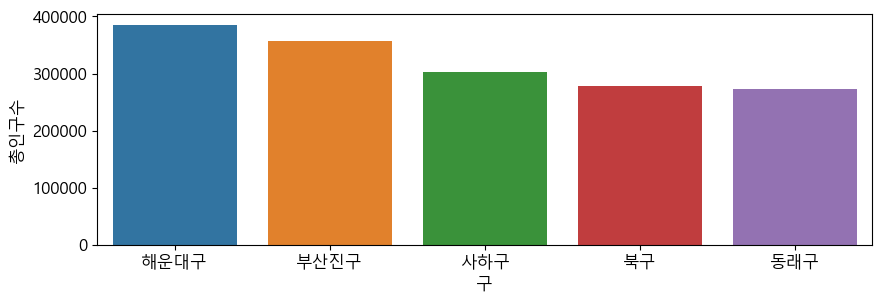

In [29]:
busan_g = busan.groupby('구')['총인구수'].sum().sort_values(ascending=False).head(5)
busan_g = busan_g.reset_index()
busan_g
plt.figure(figsize=(10,3))
sns.barplot(data=busan_g,x='구',y='총인구수')

### 9. 동별로 부산 인구를 차트로 표시합니다.(인구순 5개만)

<AxesSubplot:xlabel='총인구수', ylabel='동'>

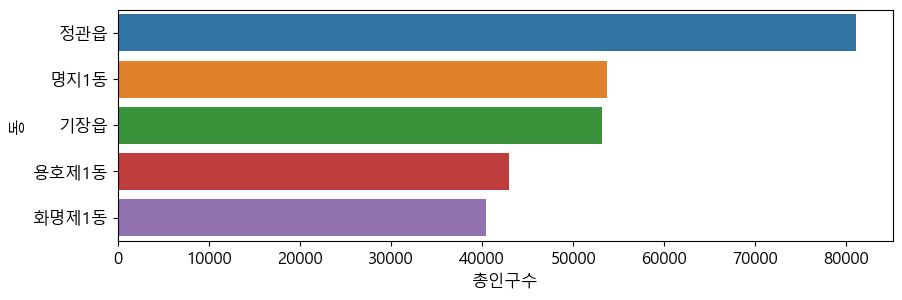

In [32]:
busan_d = busan.sort_values(by='총인구수',ascending=False).head()
plt.figure(figsize=(10,3))
sns.barplot(data=busan_d,x='총인구수',y='동')

### 10. Choropleth, geojson 등을 이용하여 동별 인구수를 색상별로 지도에 나타내시오

In [33]:
import json,folium

In [35]:
jsonfile = open('HangJeongDong_ver20230101.geojson','r',encoding='utf8').read()
jsondata = json.loads(jsonfile)
# jsondata
jsondata_busan = {'type': 'FeatureCollection'}
jsondata_pick = []
jsondata_dong = []

for idx in jsondata['features']:
    if idx['properties']['sidonm']=='부산광역시':
        dong = idx['properties']['adm_nm'].split()[-1].strip()
        idx['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(idx)
jsondata_busan['features'] = jsondata_pick

In [36]:
# jsondata_busan

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'OBJECTID': 425,
    'adm_nm': '부산광역시 중구 중앙동',
    'adm_cd': '2101051',
    'adm_cd2': '2611051000',
    'sgg': '26110',
    'sido': '26',
    'sidonm': '부산광역시',
    'temp': '중구 중앙동',
    'sggnm': '중구',
    'adm_cd8': '21010510'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[129.04001607594367, 35.111424681628996],
       [129.0427298111509, 35.11072215883535],
       [129.042347191582, 35.11034344765853],
       [129.0423152220015, 35.110297967631624],
       [129.041990699126, 35.10982871044188],
       [129.0414304709214, 35.109010295030885],
       [129.04088010913745, 35.10811134155702],
       [129.0445525636584, 35.10580584261088],
       [129.04373774886275, 35.10492439441351],
       [129.04036624750276, 35.10703056658817],
       [129.0398182034819, 35.10584181288946],
       [129.0399339281879, 35.10576888949395],
       [129.04367586047277, 35.103410637547064],
       [129.04

In [37]:
map = folium.Map(location=[35.230194, 129.074721],zoom_start=10)
folium.Choropleth(geo_data=jsondata_busan, 
                  data=busan, 
                  columns=['동','총인구수'], 
                  key_on='feature.id',
                  legend_name='부산인구').add_to(map)
map

In [38]:
df_dong = sorted(busan['동'].to_list())
len(df_dong)

205

In [41]:
json_dong = sorted(jsondata_dong)
len(json_dong)

205

In [43]:
for i, item in enumerate(zip(df_dong,json_dong)):
    if item[0] != item[1]:
        print(i, '  ', item)

2    ('가야제1동', '가야2동')
3    ('가야제2동', '가야제1동')
4    ('감만제1동', '감만1동')
5    ('감만제2동', '감만2동')
7    ('감천제1동', '감천1동')
8    ('감천제2동', '감천2동')
10    ('개금제1동', '개금1동')
11    ('개금제2동', '개금2동')
12    ('개금제3동', '개금3동')
13    ('거제제1동', '거제1동')
14    ('거제제2동', '거제2동')
15    ('거제제3동', '거제3동')
16    ('거제제4동', '거제4동')
18    ('광안제1동', '광안1동')
19    ('광안제2동', '광안2동')
20    ('광안제3동', '광안3동')
21    ('광안제4동', '광안4동')
23    ('괴정제1동', '괴정1동')
24    ('괴정제2동', '괴정2동')
25    ('괴정제3동', '괴정3동')
26    ('괴정제4동', '괴정4동')
27    ('구서제1동', '구서1동')
28    ('구서제2동', '구서2동')
30    ('구포제1동', '구포1동')
31    ('구포제2동', '구포2동')
32    ('구포제3동', '구포3동')
37    ('남부민제1동', '남부민1동')
38    ('남부민제2동', '남부민2동')
40    ('남천제1동', '남천1동')
41    ('남천제2동', '남천2동')
45    ('다대제1동', '다대1동')
46    ('다대제2동', '다대2동')
47    ('당감제1동', '당감1동')
48    ('당감제2동', '당감2동')
49    ('당감제4동', '당감4동')
51    ('대연제1동', '대연1동')
52    ('대연제3동', '대연3동')
53    ('대연제4동', '대연4동')
54    ('대연제5동', '대연5동')
55    ('대연제6동', '대연6동')
59    ('덕천제1동', '덕천1동')
60    ('덕천제2동', '

In [44]:
jsonfile = open('HangJeongDong_ver20230101.geojson','r',encoding='utf8').read()
jsondata = json.loads(jsonfile)
# jsondata
jsondata_busan = {'type': 'FeatureCollection'}
jsondata_pick = []
jsondata_dong = []

for idx in jsondata['features']:
    if idx['properties']['sidonm']=='부산광역시':
        dong = idx['properties']['adm_nm'].split()[-1].strip()
        if dong == '가야제1동':
            dong = '가야1동'
        idx['id'] = dong
        jsondata_dong.append(dong)
        jsondata_pick.append(idx)
jsondata_busan['features'] = jsondata_pick

In [45]:
df_dong = sorted(busan['동'].to_list())
json_dong = sorted(jsondata_dong)
for i, item in enumerate(zip(df_dong,json_dong)):
    if item[0] != item[1]:
        print(i, '  ', item)

2    ('가야제1동', '가야1동')
3    ('가야제2동', '가야2동')
4    ('감만제1동', '감만1동')
5    ('감만제2동', '감만2동')
7    ('감천제1동', '감천1동')
8    ('감천제2동', '감천2동')
10    ('개금제1동', '개금1동')
11    ('개금제2동', '개금2동')
12    ('개금제3동', '개금3동')
13    ('거제제1동', '거제1동')
14    ('거제제2동', '거제2동')
15    ('거제제3동', '거제3동')
16    ('거제제4동', '거제4동')
18    ('광안제1동', '광안1동')
19    ('광안제2동', '광안2동')
20    ('광안제3동', '광안3동')
21    ('광안제4동', '광안4동')
23    ('괴정제1동', '괴정1동')
24    ('괴정제2동', '괴정2동')
25    ('괴정제3동', '괴정3동')
26    ('괴정제4동', '괴정4동')
27    ('구서제1동', '구서1동')
28    ('구서제2동', '구서2동')
30    ('구포제1동', '구포1동')
31    ('구포제2동', '구포2동')
32    ('구포제3동', '구포3동')
37    ('남부민제1동', '남부민1동')
38    ('남부민제2동', '남부민2동')
40    ('남천제1동', '남천1동')
41    ('남천제2동', '남천2동')
45    ('다대제1동', '다대1동')
46    ('다대제2동', '다대2동')
47    ('당감제1동', '당감1동')
48    ('당감제2동', '당감2동')
49    ('당감제4동', '당감4동')
51    ('대연제1동', '대연1동')
52    ('대연제3동', '대연3동')
53    ('대연제4동', '대연4동')
54    ('대연제5동', '대연5동')
55    ('대연제6동', '대연6동')
59    ('덕천제1동', '덕천1동')
60    ('덕천제2동', '덕

In [46]:
busan['동'] = busan['동'].str.replace('제','')

In [47]:
df_dong = sorted(busan['동'].to_list())
json_dong = sorted(jsondata_dong)
for i, item in enumerate(zip(df_dong,json_dong)):
    if item[0] != item[1]:
        print(i, '  ', item)

13    ('거1동', '거제1동')
14    ('거2동', '거제2동')
15    ('거3동', '거제3동')
16    ('거4동', '거제4동')


In [48]:
busan['동'] = busan['동'].replace(['거1동','거2동','거3동','거4동'],['거제1동','거제2동','거제3동','거제4동'])

In [49]:
df_dong = sorted(busan['동'].to_list())
json_dong = sorted(jsondata_dong)
for i, item in enumerate(zip(df_dong,json_dong)):
    if item[0] != item[1]:
        print(i, '  ', item)

In [52]:
map = folium.Map(location=[35.230194, 129.074721],zoom_start=10)
cho = folium.Choropleth(geo_data=jsondata_busan, 
                  data=busan, 
                  columns=['동','총인구수'], 
                  key_on='feature.id',
                  legend_name='부산인구').add_to(map)
cho.geojson.add_child(
    folium.features.GeoJsonTooltip(['adm_nm'],labels=False)
)
map